In [7]:
import seaborn as sns
import numpy as np
from scipy.stats import wilcoxon
import matplotlib.pyplot as plt
import json
from vinum_analytica.visualization.plots import Plotter # type: ignore

In [8]:
def wilcoxon_test(best_index, model_data):
    """Esegue il test di Wilcoxon tra le migliori accuratezze e le altre."""
    wilcoxon_results = []
    for i, d in enumerate(model_data):
        if i == best_index:
            continue
        stat, p_value = wilcoxon(model_data[best_index]['accuracies'], d['accuracies'])
        wilcoxon_results.append((i, stat, p_value))
    return wilcoxon_results

In [9]:
def main(json_file, title):
    try:
        # Load data from JSON file
        with open(json_file, 'r') as file:
            model_data = json.load(file)

        # Calculate mean accuracy for each set
        mean_accuracies = [np.mean(d['accuracies']) for d in model_data]

        print(f"Mean accuracies: {mean_accuracies}")

        # Find the hyperparameters with the best mean accuracy
        best_index = np.argmax(mean_accuracies)
        best_data = model_data[best_index]

        # Create a mapping of indices to hyperparameters
        index_to_hyperparams = {i: d['hyperparams'] for i, d in enumerate(model_data)}

        # Perform Wilcoxon test
        wilcoxon_results = wilcoxon_test(best_index, model_data)

        print(f"Best model index: {best_index}")
        print(f"Best model hyperparameters: {best_data['hyperparams']}")
        print(f"Best model mean accuracy: {mean_accuracies[best_index]}")
        print(f"Wilcoxon test results: {wilcoxon_results}")

        # Create and show violin plot
        plotter = Plotter()
        plotter.plot_model_accuracy_comparison(model_data, index_to_hyperparams, title)

    except FileNotFoundError:
        print(f"File not found: {json_file}")
    except json.JSONDecodeError:
        print(f"Error decoding JSON file: {json_file}")
    except Exception as e:
        print(f"An error occurred: {e}")

Mean accuracies: [0.4089407242299436, 0.4086029713802808, 0.37639690578261886, 0.3632678521000729, 0.4129940961891003, 0.3624308334725539, 0.45299817719681884, 0.4047992180748214]
Best model index: 6
Best model hyperparameters: {'criterion': 'gini', 'min_impurity_decrease': 1e-08, 'max_depth': 1000}
Best model mean accuracy: 0.45299817719681884
Wilcoxon test results: [(0, 0.0, 0.03125), (1, 0.0, 0.03125), (2, 0.0, 0.03125), (3, 0.0, 0.03125), (4, 0.0, 0.03125), (5, 0.0, 0.03125), (7, 0.0, 0.03125)]


/home/paolo/anaconda3/envs/DMML/lib/python3.11/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


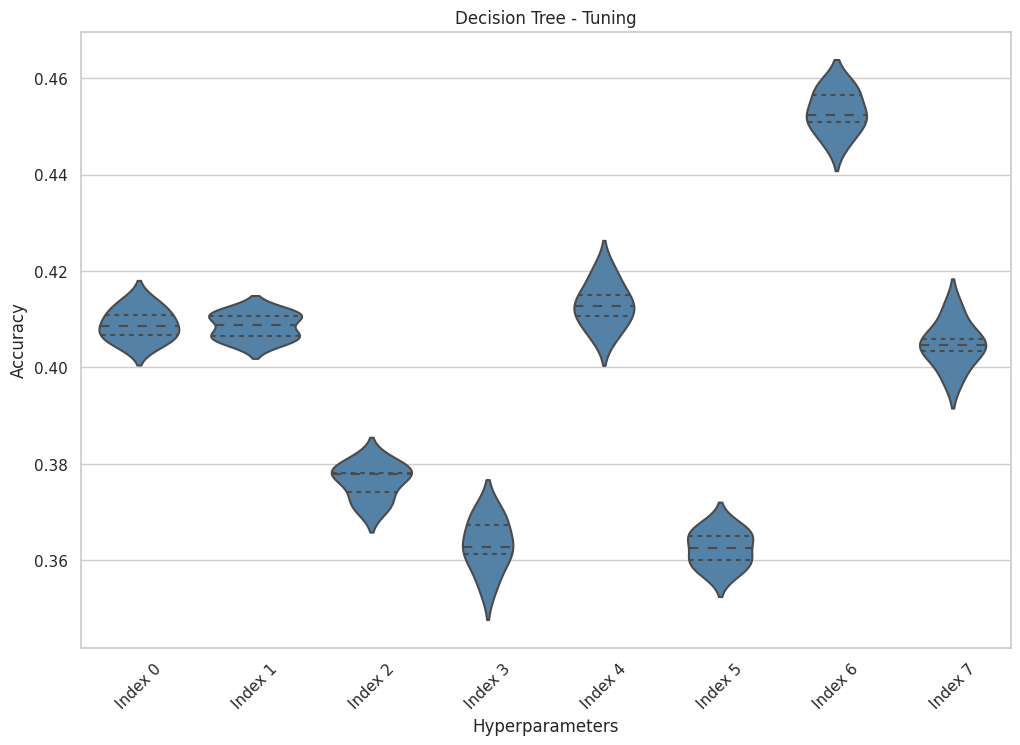


Hyperparameters Table:
Index 0: {'criterion': 'log_loss', 'min_impurity_decrease': 0.0, 'max_depth': 1000}
Index 1: {'criterion': 'entropy', 'min_impurity_decrease': 1e-12, 'max_depth': 1000}
Index 2: {'criterion': 'gini', 'min_impurity_decrease': 0.0001, 'max_depth': 1000}
Index 3: {'criterion': 'entropy', 'min_impurity_decrease': 0.0001, 'max_depth': None}
Index 4: {'criterion': 'entropy', 'min_impurity_decrease': 1e-12, 'max_depth': None}
Index 5: {'criterion': 'log_loss', 'min_impurity_decrease': 0.0001, 'max_depth': None}
Index 6: {'criterion': 'gini', 'min_impurity_decrease': 1e-08, 'max_depth': 1000}
Index 7: {'criterion': 'entropy', 'min_impurity_decrease': 1e-08, 'max_depth': 1000}


In [10]:
main('../results/dt_tuning.json', 'Decision Tree - Tuning')

Mean accuracies: [0.603013552798973, 0.6043204970996415, 0.6045996564453879, 0.593644089559624, 0.5337846750421381, 0.6201959344408715, 0.5751986107160186, 0.6196526106238159]
Best model index: 5
Best model hyperparameters: {'n_estimators': 100, 'criterion': 'gini', 'min_impurity_decrease': 0.0, 'max_depth': 1000}
Best model mean accuracy: 0.6201959344408715
Wilcoxon test results: [(0, 0.0, 0.03125), (1, 0.0, 0.03125), (2, 0.0, 0.03125), (3, 0.0, 0.03125), (4, 0.0, 0.03125), (6, 0.0, 0.03125), (7, 6.0, 0.6858304344516057)]


/home/paolo/.local/lib/python3.11/site-packages/scipy/stats/_morestats.py:4088: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "
/home/paolo/.local/lib/python3.11/site-packages/scipy/stats/_morestats.py:4102: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")
/home/paolo/anaconda3/envs/DMML/lib/python3.11/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


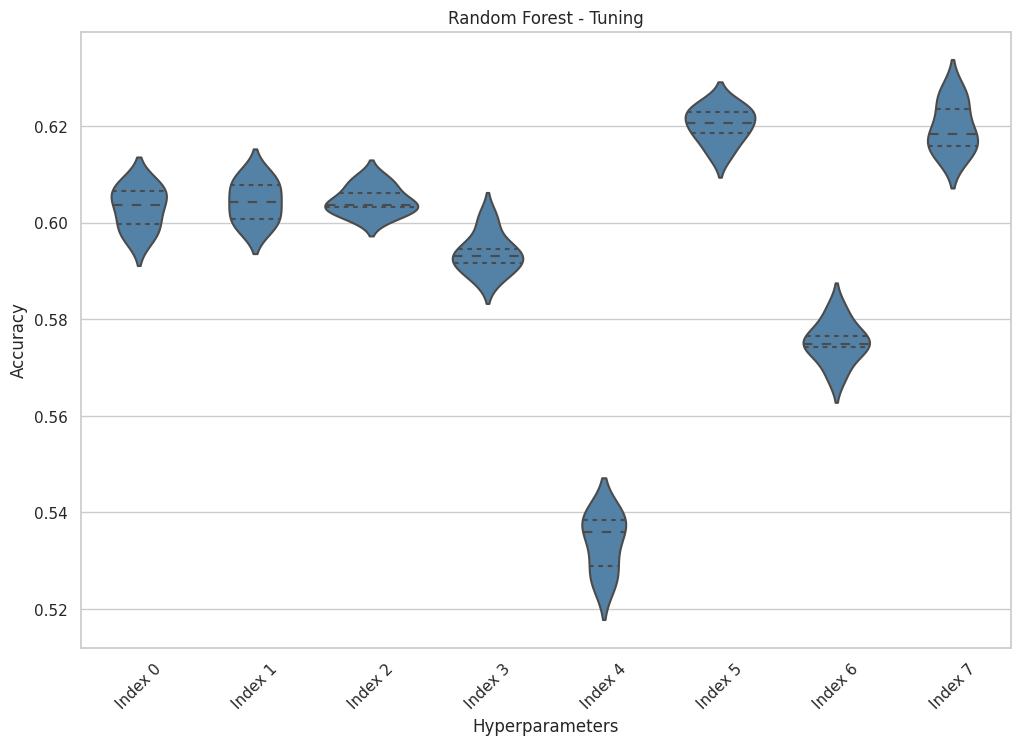


Hyperparameters Table:
Index 0: {'n_estimators': 150, 'criterion': 'log_loss', 'min_impurity_decrease': 0.0, 'max_depth': None}
Index 1: {'n_estimators': 50, 'criterion': 'gini', 'min_impurity_decrease': 1e-12, 'max_depth': None}
Index 2: {'n_estimators': 50, 'criterion': 'gini', 'min_impurity_decrease': 0.0, 'max_depth': 1000}
Index 3: {'n_estimators': 100, 'criterion': 'entropy', 'min_impurity_decrease': 1e-08, 'max_depth': None}
Index 4: {'n_estimators': 50, 'criterion': 'entropy', 'min_impurity_decrease': 0.0001, 'max_depth': None}
Index 5: {'n_estimators': 100, 'criterion': 'gini', 'min_impurity_decrease': 0.0, 'max_depth': 1000}
Index 6: {'n_estimators': 50, 'criterion': 'log_loss', 'min_impurity_decrease': 1e-12, 'max_depth': None}
Index 7: {'n_estimators': 100, 'criterion': 'gini', 'min_impurity_decrease': 0.0, 'max_depth': None}


In [11]:
main('../results/rf_tuning.json', 'Random Forest - Tuning')

Mean accuracies: [0.6032631365116493, 0.6216499416164011, 0.6050695174129431, 0.5626570579480216, 0.5739503492129868, 0.6101949277771167, 0.5604688609814178, 0.6023087729946471]
Best model index: 1
Best model hyperparameters: {'hidden_size': 64, 'epochs': 5, 'lr': 0.001}
Best model mean accuracy: 0.6216499416164011
Wilcoxon test results: [(0, 0.0, 0.03125), (2, 0.0, 0.03125), (3, 0.0, 0.03125), (4, 0.0, 0.03125), (5, 2.0, 0.09375), (6, 0.0, 0.03125), (7, 0.0, 0.03125)]


/home/paolo/anaconda3/envs/DMML/lib/python3.11/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


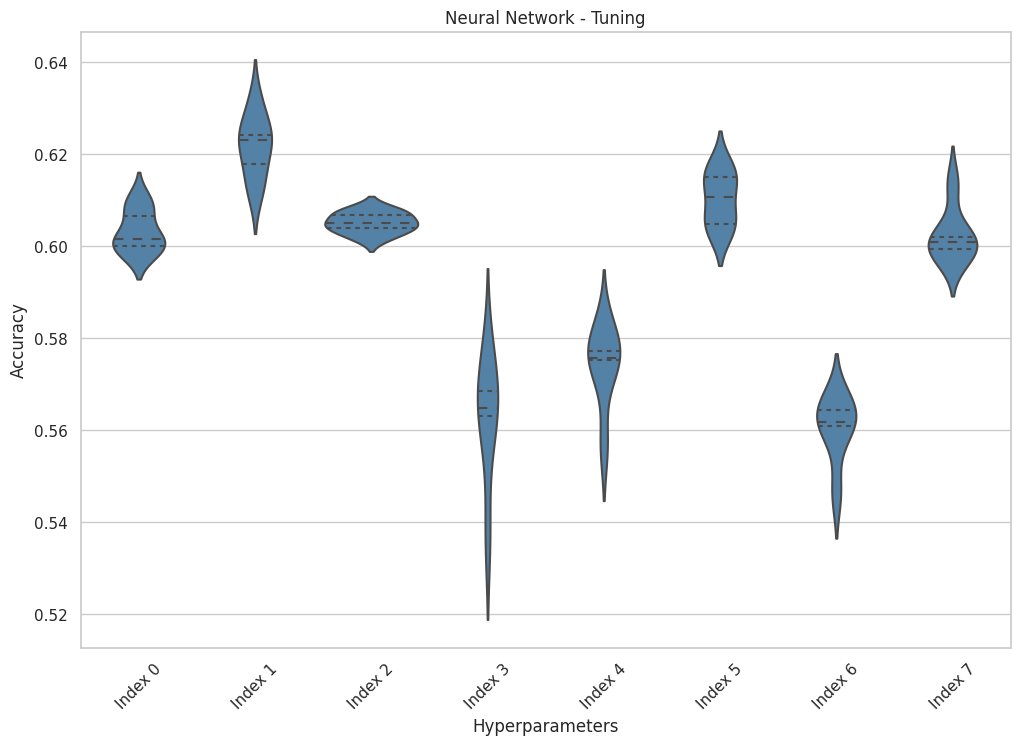


Hyperparameters Table:
Index 0: {'hidden_size': 64, 'epochs': 10, 'lr': 0.005}
Index 1: {'hidden_size': 64, 'epochs': 5, 'lr': 0.001}
Index 2: {'hidden_size': 64, 'epochs': 15, 'lr': 0.005}
Index 3: {'hidden_size': 16, 'epochs': 5, 'lr': 0.01}
Index 4: {'hidden_size': 16, 'epochs': 5, 'lr': 0.005}
Index 5: {'hidden_size': 64, 'epochs': 5, 'lr': 0.005}
Index 6: {'hidden_size': 16, 'epochs': 15, 'lr': 0.01}
Index 7: {'hidden_size': 64, 'epochs': 10, 'lr': 0.01}


In [12]:
main('../results/nn_tuning.json', 'Neural Network - Tuning')